In [60]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv('DataPreprocessingGraded_dataset.csv')
df.head()

,V1,V2,V3,V4,V5,Target
0,2.0,50.0,12500.0,98.0,NEGATIVE,YES
1,0.0,13.0,3250.0,28.0,NEGATIVE,YES
2,?,?,4000.0,35.0,NEGATIVE,YES
3,?,20.0,5000.0,45.0,NEGATIVE,YES
4,1.0,24.0,6000.0,77.0,NEGATIVE,NO


Q. How many samples are there?

In [5]:
df.shape[0]

748

Q. How many input features are there?

In [4]:
df.shape[1]-1

5

Q. Which feature has the least variance?

In [29]:
df1 = df[~df.isin(['?']).any(axis=1)].copy()

for i in df.columns[:-2]:
    df1[i] = df1[i].astype(float)
print(df1.loc[:,['V1','V2','V3','V4']].var())

V1    6.562010e+01
V2    3.336704e+01
V3    2.085440e+06
V4    5.969600e+02
dtype: float64


Q. Which of the feature has least number of outliers

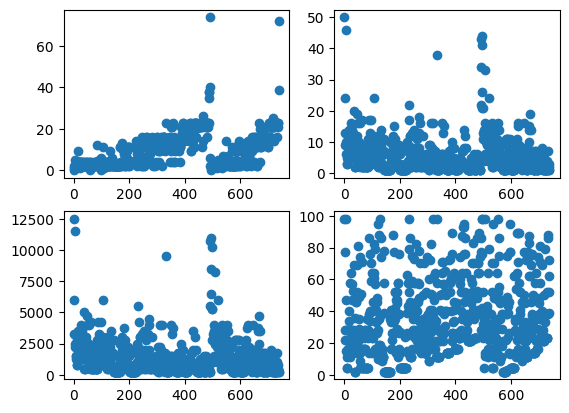

In [ ]:
fig,axis = plt.subplots(2,2)
axis[0,0].scatter([i for i in range(df1.shape[0])],df1["V1"])
axis[0,1].scatter([i for i in range(df1.shape[0])],df1["V2"])
axis[1,0].scatter([i for i in range(df1.shape[0])],df1["V3"])
axis[1,1].scatter([i for i in range(df1.shape[0])],df1["V4"])
plt.show()

Q. Is the number of NO more or number of YES more in target variable?

In [35]:
print(df["Target"].value_counts())

Target
NO     570
YES    178
Name: count, dtype: int64


Q. How many features have ? in them?

In [42]:
count = 0
for column in df.columns:
    count += 1*((df[column]=='?').sum()>0)
print(count)

2


Q. Total numer of ?

In [43]:
count = 0
for column in df.columns:
    count += ((df[column]=='?').sum())
print(count)

10


Q. Average of first feature after strategy = 'median'

In [59]:
import numpy as np
df.replace('?',np.nan,inplace=True)

df["V1"] = df["V1"].astype(float)

pipeline = Pipeline([
    ('imp',SimpleImputer(strategy='median'))
])

ct = ColumnTransformer(
    transformers=[
        ('imp1',pipeline,['V1'])
    ],remainder='passthrough'
)

ct.fit(df)
X_new = ct.transform(df)
X_new = pd.DataFrame(X_new,columns=ct.get_feature_names_out())
X_new.head()
print(X_new.imp1__V1.mean())

9.552139037433156


Q. Average of first column after applying KNNImputer(n_neighbours=3)

In [61]:
pipeline = Pipeline([
    ('imp',KNNImputer(n_neighbors=3))
])

ct = ColumnTransformer(
    transformers=[
        ('imp1',pipeline,['V1'])
    ],remainder='passthrough'
)

ct.fit(df)
X_new = ct.transform(df)
X_new = pd.DataFrame(X_new,columns=ct.get_feature_names_out())
X_new.head()
print(X_new.imp1__V1.mean())

9.562584118438762
